<a href="https://colab.research.google.com/github/nirajmg/networkLB/blob/main/nlb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [40]:
wrr = pd.read_csv('wrr.csv',names=['ip', 'response_time', 'algo_time'])
rr = pd.read_csv('rr.csv',names=['ip', 'response_time', 'algo_time'])
lrt = pd.read_csv('lrt.csv',names=['ip', 'response_time', 'algo_time'])
iph = pd.read_csv('iph.csv',names=['ip', 'response_time', 'algo_time'])
wrr8 = pd.read_csv('wrr8.csv',names=['ip', 'response_time', 'algo_time'])
wrr8_3k = pd.read_csv('wrr8-3000.csv',names=['ip', 'response_time', 'algo_time'])
wrr8_5k = pd.read_csv('wrr8-5k.csv',names=['ip', 'response_time', 'algo_time'])

algo_names = ["Weighted Round Robin","Round Robin","Least Response Time","IP Hash"]

In [45]:
for df in [wrr,rr,lrt,iph,wrr8,wrr8_3k,wrr8_5k]:
  df['response_time'] = df['response_time'].apply(lambda x: float(x[:-2]))
  df['algo_time'] = df['algo_time'].apply(lambda x: float(x[:-2]))    

In [46]:
for df in [wrr,rr,lrt,iph]:
  print(f'Number of successful calls for 1000 requests {len(df.index)}')

Number of successful calls for 1000 requests 967
Number of successful calls for 1000 requests 1000
Number of successful calls for 1000 requests 1000
Number of successful calls for 1000 requests 998


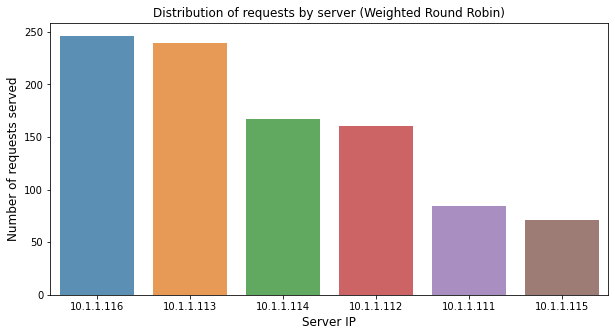

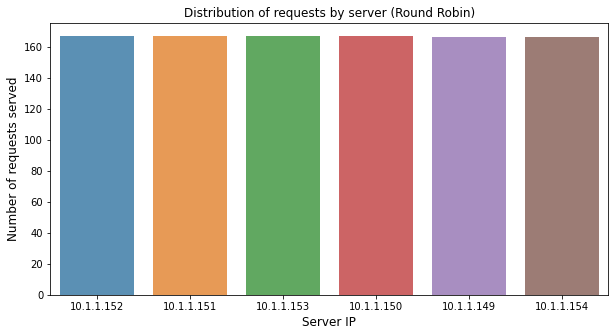

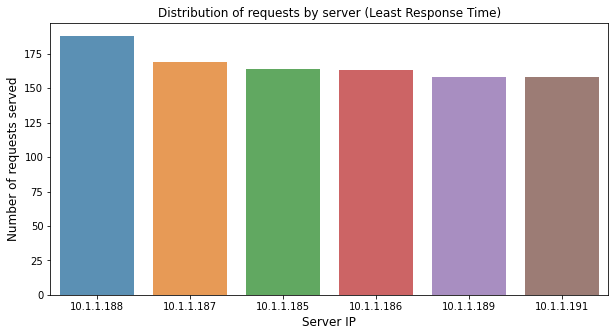

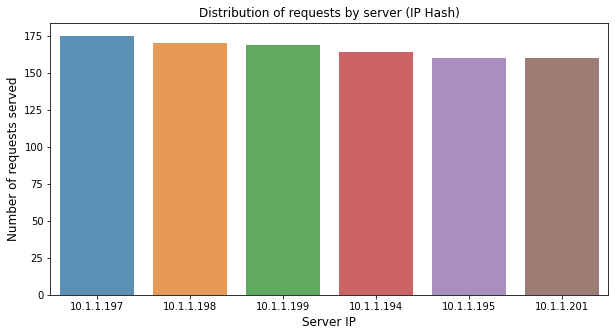

In [47]:
for i,df in enumerate([wrr,rr,lrt,iph]):
  ip_count  = df['ip'].value_counts()
  plt.figure(figsize=(10,5))
  sns.barplot(ip_count.index, ip_count.values, alpha=0.8)
  plt.title('Distribution of requests by server ({})'.format(algo_names[i]))
  plt.ylabel('Number of requests served', fontsize=12)
  plt.xlabel('Server IP', fontsize=12)
  plt.show()



In [48]:
#Average response time by algoritm
average_response_times = []
def printAvgTimePerAlgo(df):
  average_response_times.append(df['response_time'].mean())

#Average algo time by algoritm
average_algo_times = []
def printAvgAlgotimePerAlgo(df):
  average_algo_times.append(df['algo_time'].mean())

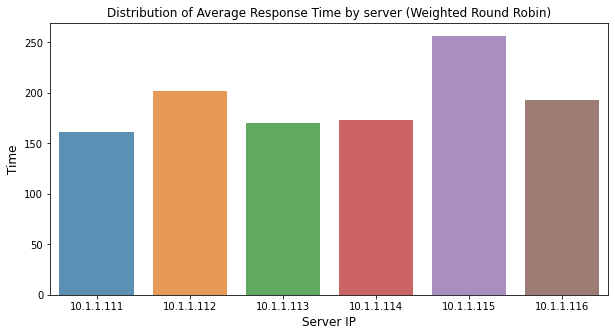

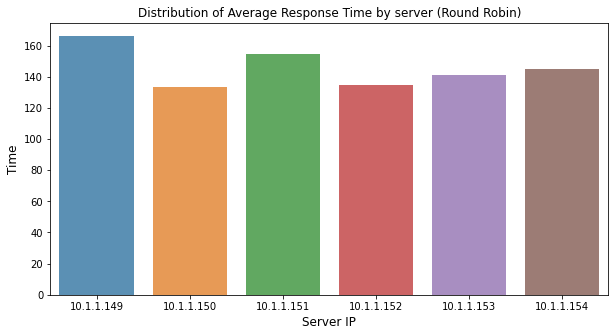

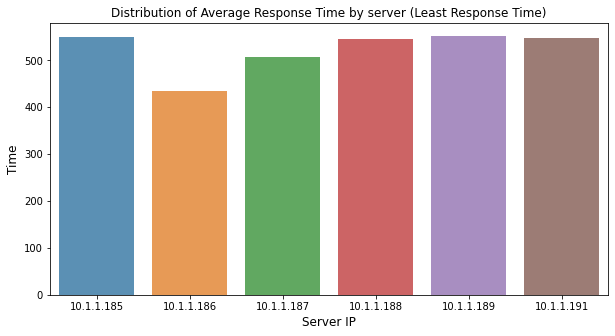

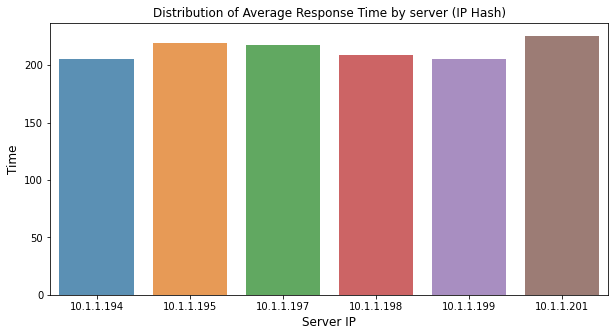

In [49]:
for i,df in enumerate([wrr,rr,lrt,iph]):
  avg_time = df.groupby('ip').mean().reset_index()
  printAvgTimePerAlgo(avg_time)
  printAvgAlgotimePerAlgo(avg_time)
  plt.figure(figsize=(10,5))
  sns.barplot(avg_time.ip, avg_time.response_time, alpha=0.8)
  plt.title('Distribution of Average Response Time by server ({})'.format(algo_names[i]))
  plt.ylabel('Time', fontsize=12)
  plt.xlabel('Server IP', fontsize=12)
  plt.show()

In [50]:
avg_time


,ip,response_time,algo_time
0,10.1.1.194,205.764094,336.093092
1,10.1.1.195,219.052454,278.825204
2,10.1.1.197,217.636563,317.192801
3,10.1.1.198,208.990419,320.289656
4,10.1.1.199,205.048387,325.497108
5,10.1.1.201,225.533909,331.128806


[192.61771910405196, 145.8592357207194, 522.3921749526445, 213.67097110747275]


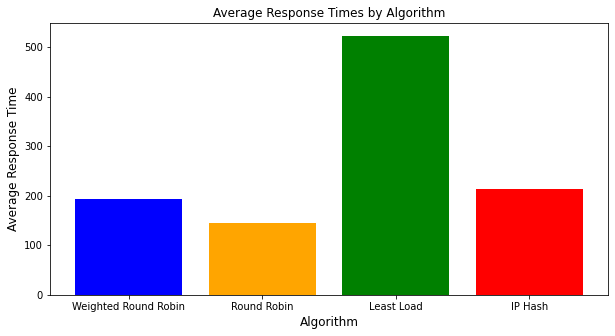

In [52]:
algo_names = ["Weighted Round Robin", "Round Robin", "Least Load", "IP Hash"]
plt.figure(figsize=(10,5))
print(average_response_times)
plt.bar(algo_names, average_response_times, color=['blue', 'orange', 'green', 'red'])
plt.title('Average Response Times by Algorithm')
plt.ylabel('Average Response Time', fontsize=12)
plt.xlabel('Algorithm', fontsize=12)
plt.show()

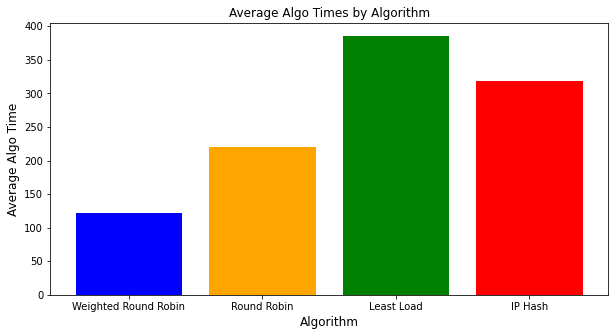

In [53]:
algo_names = ["Weighted Round Robin", "Round Robin", "Least Load", "IP Hash"]
plt.figure(figsize=(10,5))
plt.bar(algo_names, average_algo_times, color=['blue', 'orange', 'green', 'red'])
plt.title('Average Algo Times by Algorithm')
plt.ylabel('Average Algo Time', fontsize=12)
plt.xlabel('Algorithm', fontsize=12)
plt.show()

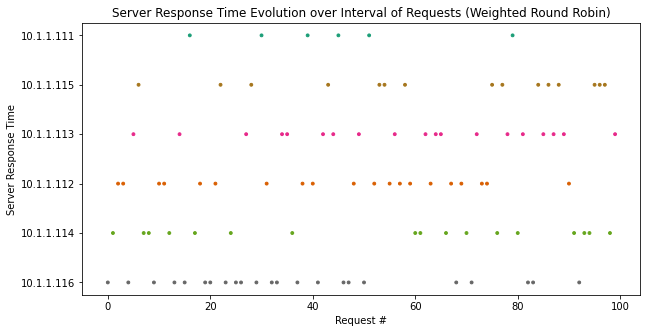

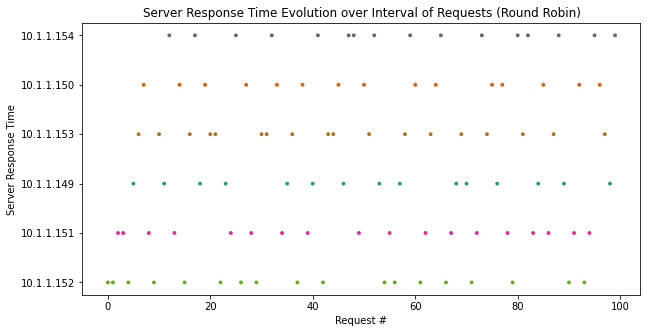

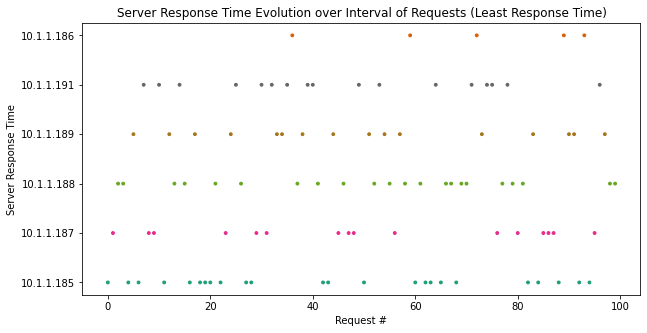

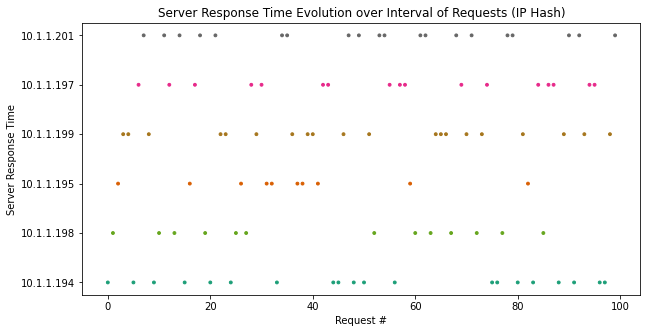

In [55]:
ptsize = 8
# colors = ["red","blue","green","black","magenta","cyan"]
for i,df in enumerate([wrr,rr,lrt,iph]):
  if i==0:
    algo="Weighted Round Robin"
  elif i==1:
    algo="Round Robin"
  elif i==2:
    algo="Least Response Time"
  else:
    algo="IP Hash"
  
  #subset dataframe
  sdf = df.iloc[:100,:]

  ips = np.unique(sdf.ip)

  #create colormap
  ip_color = {}
  for i in range(len(ips)):
    ip_color[ips[i]] = i

  colors = [ip_color[ip] for ip in sdf.ip]

  plt.figure(figsize=(10,5))
  plt.scatter(sdf.index, sdf.ip, c=colors, s=ptsize, cmap="Dark2")
  plt.title('Server Response Time Evolution over Interval of Requests ({})'.format(algo))
  plt.ylabel('Server Response Time')
  plt.xlabel('Request #')
  plt.show()

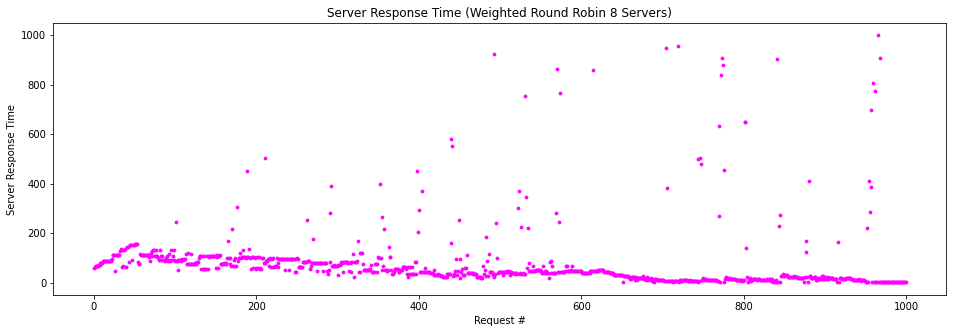

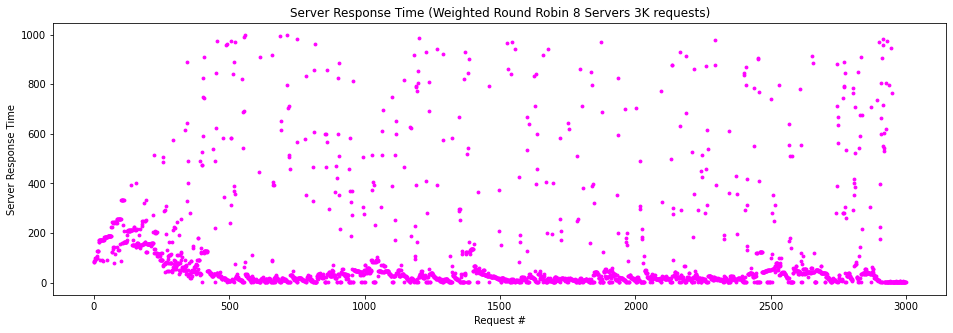

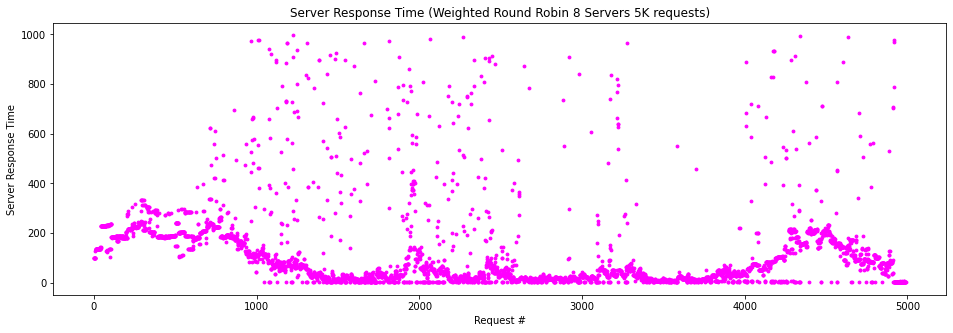

In [38]:
ptsize = 8
for i,df in enumerate([wrr8,wrr8_3k,wrr8_5k]):
  if i==0:
    algo="Weighted Round Robin 8 Servers"
  elif i==1:
    algo="Weighted Round Robin 8 Servers 3K requests"
  elif i==2:
    algo="Weighted Round Robin 8 Servers 5K requests"

  ips = np.unique(df.ip)
  plt.figure(figsize=(16,5))
  plt.scatter(df.index, df.response_time, c='magenta', s=ptsize)
  plt.title('Server Response Time ({})'.format(algo))
  plt.ylabel('Server Response Time')
  plt.xlabel('Request #')
  plt.show()

1K requests 8 servers: Average server response time: 76.65364816306
bins
0-200      942
201-400     28
401+        30
dtype: int64
3K requests 8 servers: Average server response time: 101.9018284912671
bins
0-200      2600
201-400     169
401+        230
dtype: int64
5K requests 8 servers: Average server response time: 112.68329527905593
bins
0-200      4109
201-400     660
401+        220
dtype: int64


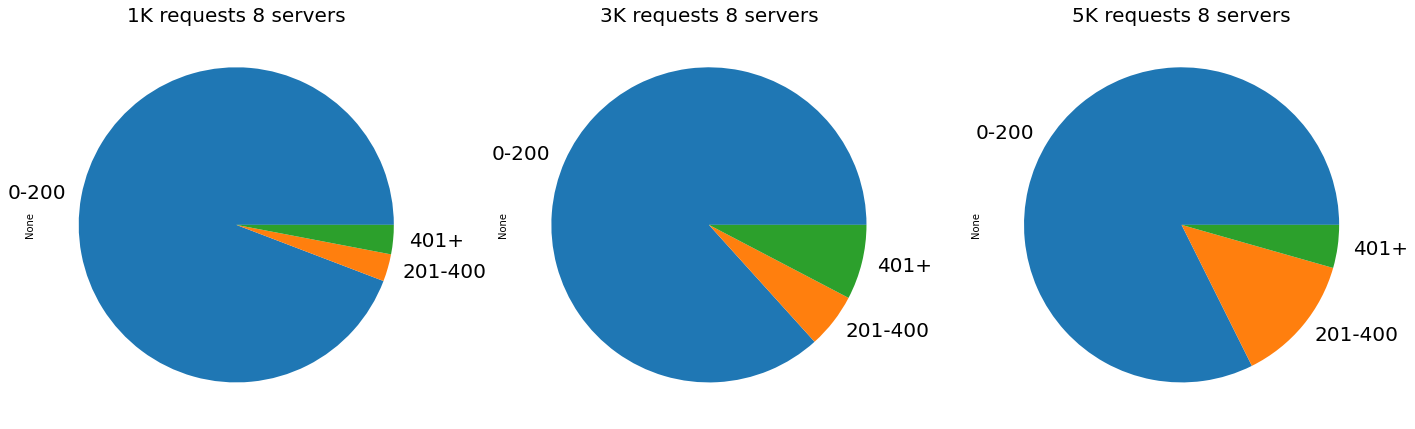

In [36]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(24,8))
ax1=plt.subplot(1,3,1)
ax2=plt.subplot(1,3,2)
ax3=plt.subplot(1,3,3)
for i,df in enumerate([wrr8,wrr8_3k,wrr8_5k]):
  if i==0:
    info="1K requests 8 servers"
    ax=ax1
  elif i==1:
    info="3K requests 8 servers"
    ax=ax2
  else:
    info="5K requests 8 servers"
    ax=ax3


  avg = df.response_time.mean()
  print("{}: Average server response time: {}".format(info,avg))

  ax.set_title(info, fontsize=20)
  df['bins'] = pd.cut(df['response_time'], bins=[0,200,400,2000], labels=["0-200","201-400","401+"])
  df = df.groupby(['bins']).size()
  print(df)
  df.plot.pie(subplots=True,ax=ax,fontsize=20)
plt.show()